<a href="https://colab.research.google.com/github/geogav/morphophen_networks_spatial/blob/main/notebooks/MorphoPhen_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [12]:
! pip install stringdb
! pip install networkx pandas

In [18]:
import stringdb
import networkx as nx
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Experiment Set-up

In [1]:
import pandas as pd

# Define the URL of the raw CSV file
url = 'https://raw.githubusercontent.com/geogav/morphophen_networks_spatial/main/datasets/GSE62642_signatureData.csv'

# Read the CSV file directly into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataframe
df.head()

,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
0,ENSG00000180543,TSPYL5,-8.249,1.873,4.362109e-17,9.724886e-13,1.0,0.610
1,ENSG00000156253,RWDD2B,-4.760,2.464,1.141343e-16,1.272255e-12,1.0,0.457
2,ENSG00000198205,ZXDA,-7.653,0.754,7.052800e-16,5.241171e-12,1.0,0.564
3,ENSG00000254245,PCDHGA3,-4.301,3.414,1.186558e-15,6.613283e-12,1.0,0.448
4,ENSG00000107438,PDLIM1,2.976,4.817,4.171822e-11,1.860132e-07,1.0,0.406


In [4]:
# Filter rows where FDR is less than  to 0.05 to keep statistically significant gene expression changes between Control and PD
filtered_df = df[df['FDR_adjusted_P.value'] < 0.05]
filtered_df.head()

,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
0,ENSG00000180543,TSPYL5,-8.249,1.873,4.362109e-17,9.724886e-13,1.0,0.610
1,ENSG00000156253,RWDD2B,-4.760,2.464,1.141343e-16,1.272255e-12,1.0,0.457
2,ENSG00000198205,ZXDA,-7.653,0.754,7.052800e-16,5.241171e-12,1.0,0.564
3,ENSG00000254245,PCDHGA3,-4.301,3.414,1.186558e-15,6.613283e-12,1.0,0.448
4,ENSG00000107438,PDLIM1,2.976,4.817,4.171822e-11,1.860132e-07,1.0,0.406


In [5]:
# Sort the dataframe by Log_FoldChange in descending order (to have the highest first)
filtered_df = filtered_df.sort_values(by='Log_FoldChange', ascending=False)
filtered_df

,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
72,ENSG00000167941,SOST,6.993,4.789,1.305371e-05,4.006424e-03,1.000,1.168
203,ENSG00000206449,MICB,6.736,-1.705,2.451351e-04,2.669996e-02,0.994,1.050
13,ENSG00000259288,BUB1B-PAK6,6.668,-0.573,1.545597e-08,2.461253e-05,1.000,0.698
90,ENSG00000237056,ZBTB22,6.121,0.055,2.524820e-05,6.217637e-03,1.000,1.049
174,ENSG00000149043,SYT8,6.081,-2.186,1.677492e-04,2.108009e-02,0.957,0.839
...,...,...,...,...,...,...,...,...
63,ENSG00000253301,LINC01606,-6.814,-1.584,6.905000e-06,2.405314e-03,0.999,0.805
8,ENSG00000143631,FLG,-7.036,0.003,6.343878e-09,1.429571e-05,1.000,0.755
2,ENSG00000198205,ZXDA,-7.653,0.754,7.052800e-16,5.241171e-12,1.000,0.564
0,ENSG00000180543,TSPYL5,-8.249,1.873,4.362109e-17,9.724886e-13,1.000,0.610


In [13]:
genes = filtered_df['Gene_symbol'].tolist()
genes

['SOST',
 'MICB',
 'BUB1B-PAK6',
 'ZBTB22',
 'SYT8',
 'IL1B',
 'KLK5',
 'HP',
 'PF4V1',
 'GATA3-AS1',
 'TYR',
 'OR8S1',
 'LINC00968',
 'TCERG1L',
 'HLA-F',
 'CCL18',
 'AFP',
 'HAND2',
 'S1PR5',
 'MSX2',
 'HTR3A',
 'MS4A6A',
 'MS4A6E',
 'PTH1R',
 'IL1A',
 'SLN',
 'AMY1C',
 'GPR87',
 'GCNT4',
 'IGFBP3',
 'TLR4',
 'SERPINE1',
 'PIRT',
 'ACTA2',
 'ITGA11',
 'DIO2',
 'ANKRD1',
 'ACTG2',
 'CFH',
 'GATA3',
 'WSCD2',
 'SPHK1',
 'PLAU',
 'RPE65',
 'LINC01411',
 'LRRC14B',
 'MYL3',
 'SELE',
 'PDPN',
 'IGFBP7',
 'LINC00052',
 'FAM135B',
 'MYL9',
 'C6',
 'COL11A1',
 'IFITM1',
 'STEAP3',
 'KLK6',
 'PLA2G2A',
 'HOPX',
 'CFB',
 'OMG',
 'PDLIM1',
 'CFB',
 'PROCR',
 'CTSV',
 'LAYN',
 'CCL2',
 'CFB',
 'CFB',
 'CASP4',
 'CAVIN1',
 'C7',
 'CARTPT',
 'CDKN2B',
 'LIF',
 'CDCP1',
 'P3H2',
 'COLEC12',
 'D21S2088E',
 'FZD10',
 'TAGLN',
 'NRAP',
 'APOE',
 'TRIM55',
 'LOC153684',
 'PRPH',
 'ALDH1A1',
 'PCP4',
 'CLEC3A',
 'ANGPTL4',
 'GPNMB',
 'KCNE1',
 'BMPER',
 'ASS1',
 'IFIT1',
 'THBS1',
 'GBP1',
 'CRISPLD1',


In [7]:
# Isolate differentially over-expressed genes
upgenes_df = filtered_df[filtered_df['Log_FoldChange'] > 0]
upgenes_df

,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
72,ENSG00000167941,SOST,6.993,4.789,1.305371e-05,0.004006,1.000,1.168
203,ENSG00000206449,MICB,6.736,-1.705,2.451351e-04,0.026700,0.994,1.050
13,ENSG00000259288,BUB1B-PAK6,6.668,-0.573,1.545597e-08,0.000025,1.000,0.698
90,ENSG00000237056,ZBTB22,6.121,0.055,2.524820e-05,0.006218,1.000,1.049
174,ENSG00000149043,SYT8,6.081,-2.186,1.677492e-04,0.021080,0.957,0.839
...,...,...,...,...,...,...,...,...
283,ENSG00000164111,ANXA5,1.134,7.831,4.575175e-04,0.036017,0.998,0.312
257,ENSG00000140538,NTRK3,1.091,5.816,3.921102e-04,0.033927,0.997,0.296
239,ENSG00000111859,NEDD9,1.067,6.242,3.325817e-04,0.030894,0.998,0.287
293,ENSG00000145012,LPP,0.988,5.905,5.184037e-04,0.039374,0.995,0.275


In [10]:
# Make a list of the gene names - we need that to send it to STRINGdb
upgenes_list = upgenes_df['Gene_symbol'].tolist()
upgenes_list

['SOST',
 'MICB',
 'BUB1B-PAK6',
 'ZBTB22',
 'SYT8',
 'IL1B',
 'KLK5',
 'HP',
 'PF4V1',
 'GATA3-AS1',
 'TYR',
 'OR8S1',
 'LINC00968',
 'TCERG1L',
 'HLA-F',
 'CCL18',
 'AFP',
 'HAND2',
 'S1PR5',
 'MSX2',
 'HTR3A',
 'MS4A6A',
 'MS4A6E',
 'PTH1R',
 'IL1A',
 'SLN',
 'AMY1C',
 'GPR87',
 'GCNT4',
 'IGFBP3',
 'TLR4',
 'SERPINE1',
 'PIRT',
 'ACTA2',
 'ITGA11',
 'DIO2',
 'ANKRD1',
 'ACTG2',
 'CFH',
 'GATA3',
 'WSCD2',
 'SPHK1',
 'PLAU',
 'RPE65',
 'LINC01411',
 'LRRC14B',
 'MYL3',
 'SELE',
 'PDPN',
 'IGFBP7',
 'LINC00052',
 'FAM135B',
 'MYL9',
 'C6',
 'COL11A1',
 'IFITM1',
 'STEAP3',
 'KLK6',
 'PLA2G2A',
 'HOPX',
 'CFB',
 'OMG',
 'PDLIM1',
 'CFB',
 'PROCR',
 'CTSV',
 'LAYN',
 'CCL2',
 'CFB',
 'CFB',
 'CASP4',
 'CAVIN1',
 'C7',
 'CARTPT',
 'CDKN2B',
 'LIF',
 'CDCP1',
 'P3H2',
 'COLEC12',
 'D21S2088E',
 'FZD10',
 'TAGLN',
 'NRAP',
 'APOE',
 'TRIM55',
 'LOC153684',
 'PRPH',
 'ALDH1A1',
 'PCP4',
 'CLEC3A',
 'ANGPTL4',
 'GPNMB',
 'KCNE1',
 'BMPER',
 'ASS1',
 'IFIT1',
 'THBS1',
 'GBP1',
 'CRISPLD1',


In [8]:
# Isolate differentially under-expressed genes
downgenes_df = filtered_df[filtered_df['Log_FoldChange'] < 0]
downgenes_df

,Ensembl_ID,Gene_symbol,Log_FoldChange,logCPM,PValue,FDR_adjusted_P.value,Power,BCOV
278,ENSG00000158164,TMSB15A,-0.928,5.585,4.565908e-04,3.601737e-02,0.992,0.255
327,ENSG00000254995,STX16-NPEPL1,-0.968,5.836,6.809158e-04,4.642127e-02,0.993,0.275
315,ENSG00000197093,GAL3ST4,-0.997,5.577,6.253891e-04,4.425732e-02,0.992,0.281
297,ENSG00000134294,SLC38A2,-1.015,7.770,5.552283e-04,4.153779e-02,0.998,0.284
236,ENSG00000153956,CACNA2D1,-1.043,8.026,3.216407e-04,3.025594e-02,0.999,0.280
...,...,...,...,...,...,...,...,...
63,ENSG00000253301,LINC01606,-6.814,-1.584,6.905000e-06,2.405314e-03,0.999,0.805
8,ENSG00000143631,FLG,-7.036,0.003,6.343878e-09,1.429571e-05,1.000,0.755
2,ENSG00000198205,ZXDA,-7.653,0.754,7.052800e-16,5.241171e-12,1.000,0.564
0,ENSG00000180543,TSPYL5,-8.249,1.873,4.362109e-17,9.724886e-13,1.000,0.610


In [11]:
# Make a list of the gene names - we need that to send it to STRINGdb
downgenes_list = downgenes_df['Gene_symbol'].tolist()
downgenes_list

['TMSB15A',
 'STX16-NPEPL1',
 'GAL3ST4',
 'SLC38A2',
 'CACNA2D1',
 'ZNF333',
 'YPEL1',
 'IGSF9',
 'GLCCI1',
 'USP49',
 'TNRC6C',
 'LPAR2',
 'HCN3',
 'HCN3',
 'KLHDC8A',
 'ZNF382',
 'CELF3',
 'SLC4A7',
 'TRIM36',
 'RGMA',
 'CELSR3',
 'SH2D3C',
 'CARMIL3',
 'PCBP4',
 'SLC1A2',
 'RNF165',
 'FAM57B',
 'MYT1',
 'MYT1',
 'SCRT1',
 'MEX3B',
 'PCDHGC3',
 'LRP8',
 'GREM2',
 'DGKB',
 'PNCK',
 'GPM6A',
 'LRRC61',
 'SLITRK3',
 'GRIK2',
 'GLYCTK',
 'DRD2',
 'LMO3',
 'PLCL2',
 'MTUS2',
 'KCNH8',
 'ZNF441',
 'CNGA3',
 'RAMP2-AS1',
 'ADCYAP1',
 'ANK1',
 'RNF112',
 'GRIA2',
 'DCC',
 'OPCML',
 'SV2B',
 'PDZRN4',
 'DSCAML1',
 'GLRA2',
 'POU2F2',
 'DGKK',
 'FAM66C',
 'DSCAM',
 'INSM2',
 'HRC',
 'ZBED6CL',
 'INHBA-AS1',
 'MMP10',
 'HSPA2',
 'CNGB1',
 'TRPC5',
 'GALNT9',
 'ZNF385D',
 'NR4A2',
 'ASIC4',
 'CDH12',
 'ZNF726',
 'HTR1A',
 'C1QL1',
 'TH',
 'C5orf17',
 'C11orf70',
 'LHX5',
 'ZNF98',
 'ZNF676',
 'ZNF676',
 'ZNF681',
 'CISTR',
 'KIFC1',
 'PCDHGA7',
 'ZNF208',
 'CPLX3',
 'PCDHA13',
 'CTSF',
 'PCDHGA3

In [16]:
string_ids = stringdb.get_string_ids(genes, species = 9606)   # human is 'species=9606'
network_df = stringdb.get_network(string_ids.queryItem, species = 9606, required_score=400)

In [17]:
# Perform pathway enrichment
enrichment_df = stringdb.get_enrichment(string_ids.queryItem, species = 9606)
enrichment_df

,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description
0,COMPARTMENTS,GOCC:0005576,80,2079,9606,"VCL,PROCR,CTSH,SERPINE1,ACTA2,CCL2,PF4V1,TTR,T...","VCL,PROCR,CTSH,SERPINE1,ACTA2,CCL2,PF4V1,TTR,T...",2.070000e-13,4.750000e-10,Extracellular region
1,COMPARTMENTS,GOCC:0071944,118,3860,9606,"CELSR3,VCL,PROCR,GLRA2,SERPINE1,FZD10,TGFB3,OM...","CELSR3,VCL,PROCR,GLRA2,SERPINE1,FZD10,TGFB3,OM...",4.140000e-13,4.760000e-10,Cell periphery
2,COMPARTMENTS,GOCC:0030054,47,1053,9606,"VCL,PROCR,GLRA2,APOE,PDGFRB,CDH6,EGFR,SLC1A2,G...","VCL,PROCR,GLRA2,APOE,PDGFRB,CDH6,EGFR,SLC1A2,G...",5.200000e-10,3.990000e-07,Cell junction
3,COMPARTMENTS,GOCC:0030312,22,259,9606,"SERPINE1,TGFB3,APOE,MATN2,THBS1,LTBP2,IL1B,TIM...","SERPINE1,TGFB3,APOE,MATN2,THBS1,LTBP2,IL1B,TIM...",8.430000e-10,4.850000e-07,External encapsulating structure
4,COMPARTMENTS,GOCC:0031012,22,259,9606,"SERPINE1,TGFB3,APOE,MATN2,THBS1,LOXL1,LTBP2,IL...","SERPINE1,TGFB3,APOE,MATN2,THBS1,LOXL1,LTBP2,IL...",8.430000e-10,4.850000e-07,Extracellular matrix
...,...,...,...,...,...,...,...,...,...,...
557,NetworkNeighborAL,CL:22574,7,57,9606,"ACTA2,MYL9,TPM1,TAGLN,ACTG2,TPM2,MYL3","ACTA2,MYL9,TPM1,TAGLN,ACTG2,TPM2,MYL3",6.700000e-05,3.410000e-02,"Muscle protein, and Myosin light chain kinase ..."
558,NetworkNeighborAL,CL:18723,12,196,9606,"PROCR,SERPINE1,APOE,C6,ANGPTL4,LRP8,C7,OLFML3,...","PROCR,SERPINE1,APOE,C6,ANGPTL4,LRP8,C7,OLFML3,...",1.300000e-04,4.420000e-02,"Mixed, incl. Complement and coagulation cascad..."
559,NetworkNeighborAL,CL:18726,11,161,9606,"PROCR,SERPINE1,APOE,C6,ANGPTL4,LRP8,C7,HP,CFH,...","PROCR,SERPINE1,APOE,C6,ANGPTL4,LRP8,C7,HP,CFH,...",9.710000e-05,4.420000e-02,"Complement and coagulation cascades, and Prote..."
560,NetworkNeighborAL,CL:19272,4,12,9606,"S100A11,ANXA2,AHNAK,ANXA11","S100A11,ANXA2,AHNAK,ANXA11",9.670000e-05,4.420000e-02,"Mixed, incl. Positive regulation of plasma mem..."


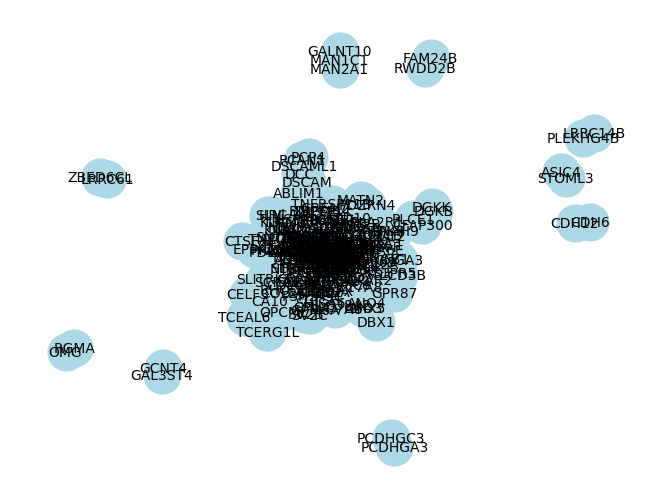

In [19]:
# Create a Networkx model

G = nx.Graph()

#Add edges to the graph from the DataFrame
for index, row in network_df.iterrows():
    G.add_edge(row['preferredName_A'], row['preferredName_B'], weight=row['score'])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10)

# Draw edge labels with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [21]:
# Sanity check 2: Inspect node attributes
node_attributes = {node: G.nodes[node] for node in G.nodes()}
node_df = pd.DataFrame(node_attributes).T

print("Node Attributes:")
print(node_df)

Node Attributes:
Empty DataFrame
Columns: []
Index: [CELSR3, EGFR, FZD6, CA12, SERPINE1, SLC4A7, VCL, TUBB6, NEDD9, LAYN, THBS1, SELE, TAGLN, NRAP, PDGFRB, ANK1, TNS3, LPP, ACTG2, ANXA5, ACTA2, PDLIM1, TPM2, MYL9, LIMA1, GJA1, TPM1, FLNC, FLNB, ACTN1, PROCR, IL1B, CD47, PF4V1, LRP8, CCL2, CTSH, CFB, P3H2, HP, GPC3, ID1, GPX8, IGFBP7, TNFRSF12A, ANGPTL4, TTR, TGFB3, CCL18, TIMP3, MMP14, IGFBP3, APOE, CCN1, MMP10, TLR4, IL1A, ANXA2, CCN2, PLAU, MYL3, LTBP2, ANKRD1, SPHK1, IFITM3, CP, NQO1, GATA3, GBP1, NTRK3, TYR, MAFB, PROM1, CD83, B2M, CFH, IFIT1, IL4R, LIF, FZD10, GPC4, WNT2B, BAMBI, TYRP1, ALDH1A1, DIO2, AFP, SMAD6, VASN, LTBP1, MSX2, TBX2, HAND2, FGFR2, MT2A, PLA2G2A, OMG, RGMA, IL13RA2, CNGB1, ...]

[242 rows x 0 columns]


In [22]:
# Sanity check 1: Inspect edge attributes
edge_attributes = [{'source': source, 'target': target, **attr}
                   for source, target, attr in G.edges(data=True)]

edge_df = pd.DataFrame(edge_attributes)

print("Edge Attributes:")
print(edge_df)

Edge Attributes:
      source    target  weight
0     CELSR3      EGFR   0.400
1     CELSR3      FZD6   0.742
2       EGFR       VCL   0.587
3       EGFR  SERPINE1   0.699
4       EGFR     ACTA2   0.530
..       ...       ...     ...
832     CA10    TCEAL6   0.416
833  ZBED6CL    LRRC61   0.936
834    ASIC4    STOML3   0.422
835     RHOU      PAK6   0.515
836   FAM24B    RWDD2B   0.570

[837 rows x 3 columns]
